Data description:

The data contains 700 good and 300 bad credits with 20 predictor variables. Data from 1973 to 1975.

In [552]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [553]:
#This is an ASCII file. The delimiter here is a space.
df = pd.read_csv('SouthGermanCredit.asc', delimiter=' ')

In [554]:
#Renaming from german language for understanding
df.rename(columns={
    "laufkont": "status",
    "laufzeit": "duration",
    "moral": "credit_history",
    "verw": "purpose",
    "hoehe": "amount",
    "sparkont": "savings",
    "beszeit": "employment_duration",
    "rate": "installment_rate",
    "famges": "personal_status_sex",
    "buerge": "other_debtors",
    "wohnzeit": "present_residence",
    "verm": "property",
    "alter": "age",
    "weitkred": "other_installment_plans",
    "wohn": "housing",
    "bishkred": "number_credits",
    "beruf": "job",
    "pers": "people_liable",
    "telef": "telephone",
    "gastarb": "foreign_worker",
    "kredit": "credit_risk"
}, inplace=True)

In [555]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [556]:
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [557]:
#Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64


In [558]:
# Split the data into numerical and categorical
numerical_features = ['duration', 'amount', 'age']
categorical_features = [col for col in df.columns if col not in numerical_features]

In [559]:
# Define the data preprocessing methods for numerical and categorical data
scaler = MinMaxScaler()
categorical_features = list(set(df.columns) - set(numerical_features))


In [560]:
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

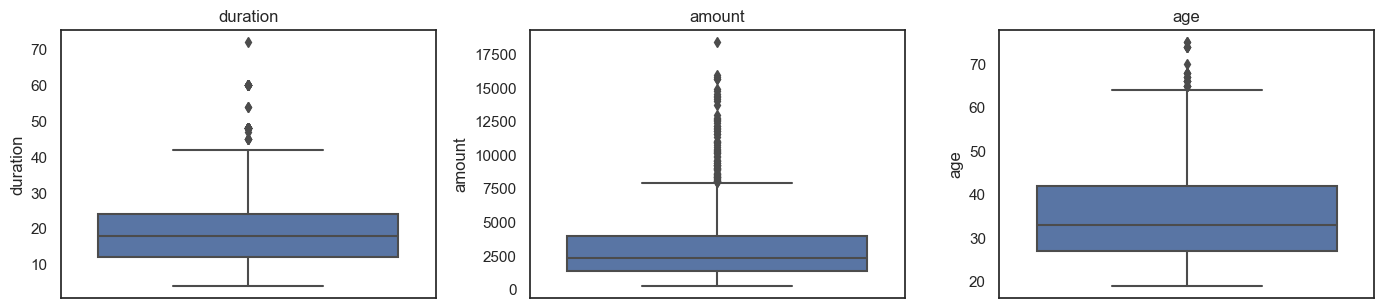

In [561]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(14, 9))

# Iterate over each numerical feature and create a subplot for each
for i, feature in enumerate(numerical_features):
    ax = fig.add_subplot(3, 3, i+1)
    sns.boxplot(y=df[feature], ax=ax)
    ax.set_title(feature)

# Show the plot
plt.tight_layout()
plt.show()

In [562]:
# Remove outliers
df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [563]:
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,...,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,2.620650,18.116009,2.567285,2.698376,2531.421114,2.078886,3.393271,3.017401,2.680974,1.151972,...,2.256381,34.694896,2.689095,1.886311,1.397912,2.866589,1.846868,1.377030,1.960557,0.735499
std,1.267366,8.690069,1.066651,2.574235,1663.651947,1.558997,1.191180,1.107853,0.723962,0.492796,...,1.019177,10.233894,0.693991,0.501865,0.564654,0.622514,0.360324,0.484924,0.194760,0.441323
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.000000,1.000000,1308.250000,1.000000,3.000000,2.000000,2.000000,1.000000,...,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.000000,2.000000,2066.500000,1.000000,3.000000,3.000000,3.000000,1.000000,...,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.000000,3.000000,3355.000000,3.000000,5.000000,4.000000,3.000000,1.000000,...,3.000000,40.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,42.000000,4.000000,10.000000,7882.000000,5.000000,5.000000,4.000000,4.000000,3.000000,...,4.000000,64.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


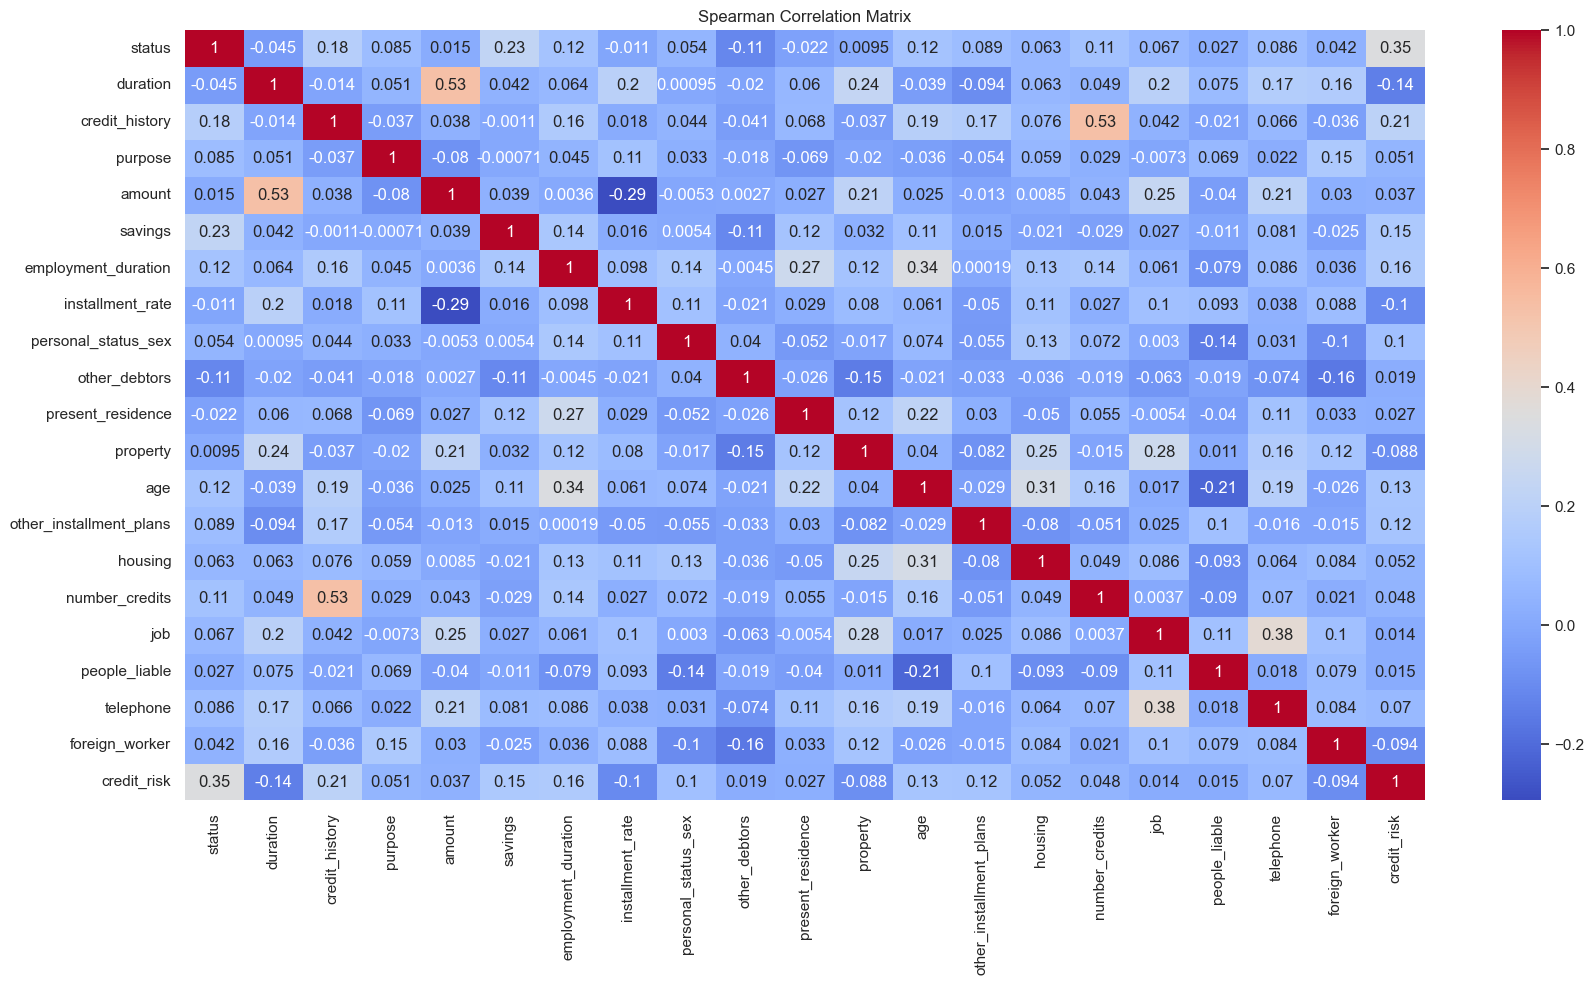

In [564]:
correlation_matrix = df.corr(method='spearman')

sns.set(style='white')
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

In [565]:
numcols =df[['duration', 'amount', 'age']]

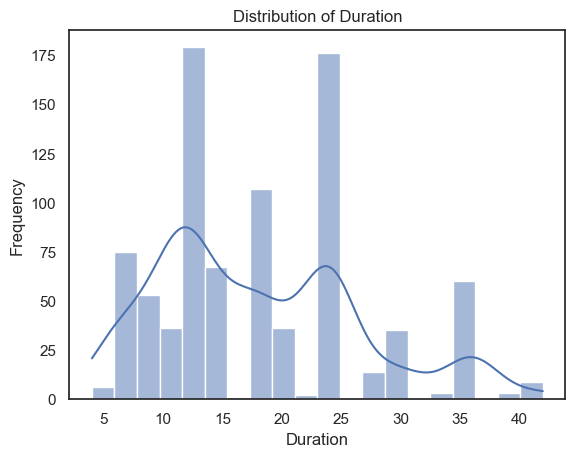

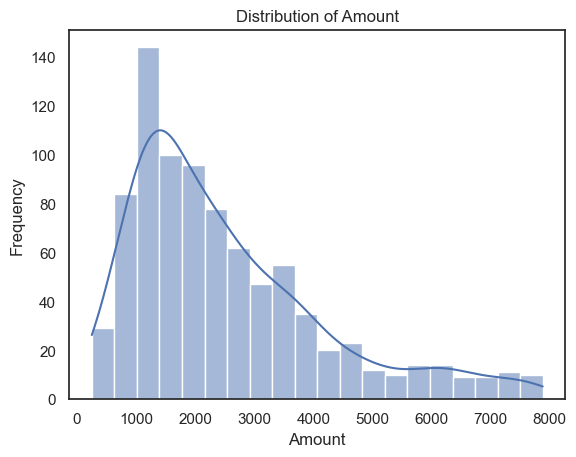

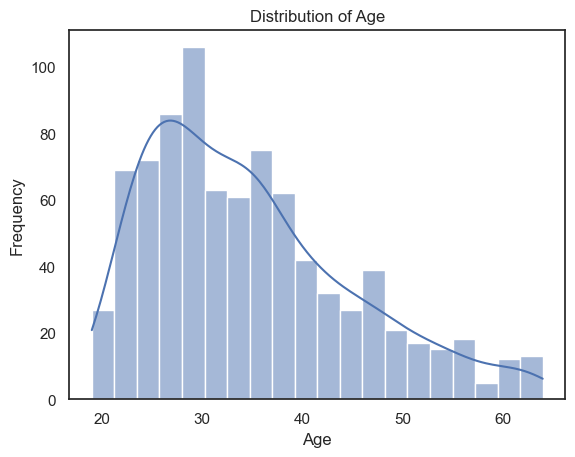

In [566]:
for column in numcols.columns:
    sns.histplot(numcols, x=column, bins=20, kde=True)
    plt.title(f"Distribution of {column.capitalize()}")
    plt.xlabel(column.capitalize())
    plt.ylabel("Frequency")
    plt.show()

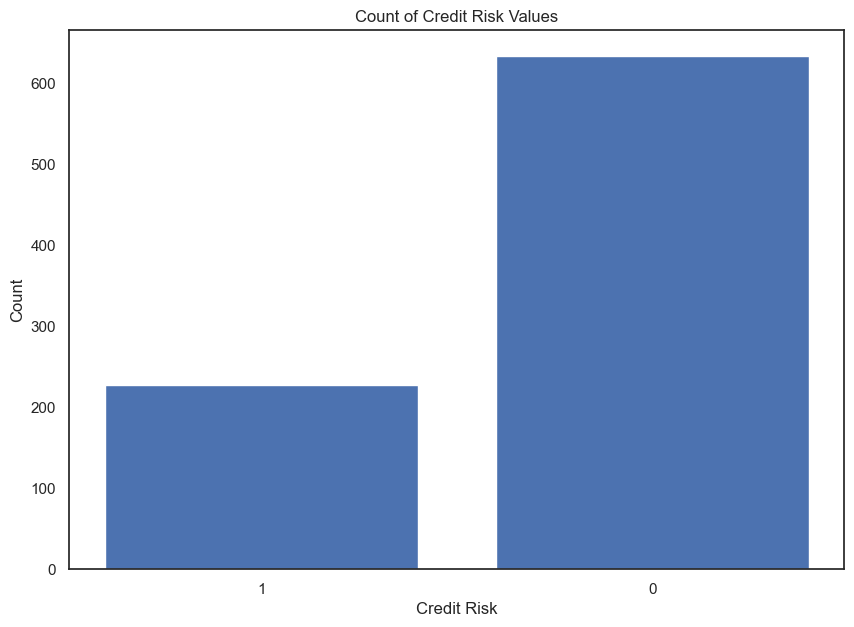

In [567]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Count the "Credit Risk" values
credit_risk_counts = df['credit_risk'].value_counts()

# Generate a bar graph
plt.figure(figsize=(10,7))
plt.bar(credit_risk_counts.index, credit_risk_counts.values, tick_label=['0', '1'])
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.title('Count of Credit Risk Values')
plt.show()


In [568]:
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

In [569]:
# Data pipelining
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)])

In [570]:
# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

In [571]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [572]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['duration', 'amount',
                                                   'age'])])),
                ('classifier', RandomForestClassifier())])

In [573]:
# Predict on test data
y_pred = clf.predict(X_test)

In [574]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.21      0.22        14
           1       0.85      0.86      0.86        73

    accuracy                           0.76        87
   macro avg       0.54      0.54      0.54        87
weighted avg       0.75      0.76      0.75        87



The model is excellent in terms of finding good credit risk, but lacks in predicting bad credit risk. This could be due to huge variance in data points for predicting bad credit risk. Give more data, this might be sorted.

In [575]:
# Print classification report
print(accuracy_score(y_test, y_pred))

0.7586206896551724


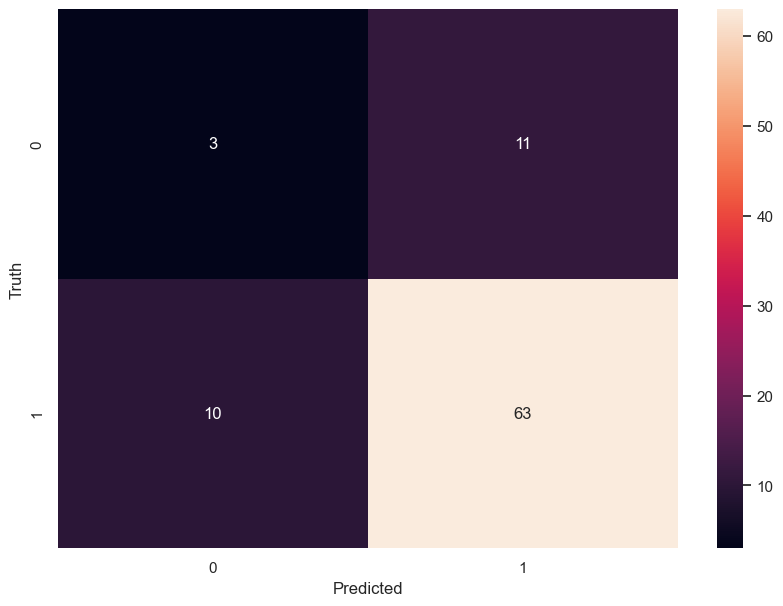

In [576]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on test data
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [577]:
# Create a sample new data point
new_data = pd.DataFrame([X.iloc[2]])  #Check the row you want to test
new_data_pred = clf.predict(new_data)
print("The predicted outcome for the new data point is: ", new_data_pred)

The predicted outcome for the new data point is:  [1]
